In [1]:
(x1,x2,x3)=(0.7,0.3,0.5)
(w11,w12,w13)=(0.3,1.0,0.0)
(w21,w22,w23)=(0.8,0.3,0.5)

y1=x1*w11 + x2*w12 + x3*w13
y2=x1*w21 + x2*w22 + x3*w23

(y1,y2)


(0.51, 0.8999999999999999)

In [2]:
def calcula_salida(x,w):
  y=[]
  for i in range(len(w)):
    yi=0
    for j in range(len(x)):
       yi=yi+w[i][j]*x[j]
    y.append(yi)

  return y
x=[x1,x2,x3]
w=[[w11,w12,w13],[w21,w22,w23]]
y=calcula_salida(x,w)
y



[0.51, 0.8999999999999999]

In [3]:
def calculadora_salidas(xs,w):
  ys=[]
  for x in xs:
     y=calcula_salida(x,w)
     ys.append(y)
  return ys
xs=[[x1,x2,x3],[0.3,0.6,0.8]]
y_cacl=calculadora_salidas(xs,w)
y_cacl


[[0.51, 0.8999999999999999], [0.69, 0.8200000000000001]]

In [4]:
cubo=       [[0.5,0.5,0.5],
             [0.5,0.5,1.0],
             [0.5,1.0,0.5],
             [0.5,1.0,1.0],
             [1.0,0.5,0.5],
             [1.0,0.5,1.0],
             [1.0,1.0,0.5],
             [1.0,1.0,1.0],
      ]
sombra = [[0.5263, 0.5263],
          [0.5555, 0.5555],
          [0.5263, 1.0526],
          [0.5555, 1.1111],
          [1.0526, 0.5263],
          [1.1111, 0.5555],
          [1.0526, 1.0526],
          [1.1111, 1.1111]]

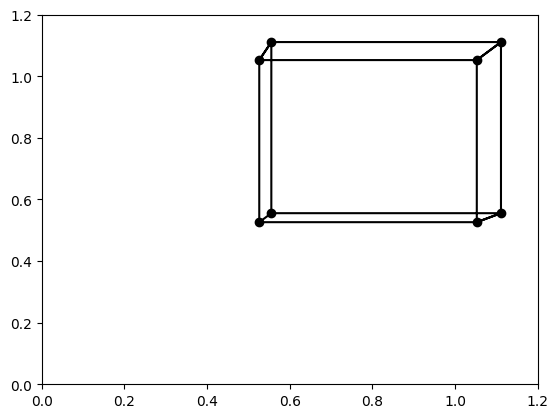

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def dibuja(sombra):
    p = np.array(sombra)
    plt.scatter(*p.T, color='black')

    p1 = [sombra[0], sombra[2],
          sombra[6], sombra[4],
          sombra[0], sombra[1],
          sombra[3], sombra[2], sombra[3],
          sombra[7], sombra[6], sombra[7],
          sombra[5], sombra[4], sombra[5],
          sombra[1]]

    p1 = np.array(p1)
    l1 = p1.transpose()
    plt.plot(*l1, color='black')
    plt.axis([0, 1.2, 0, 1.2])
    return plt.show()

# Se dibuja la sombra
dibuja(sombra)

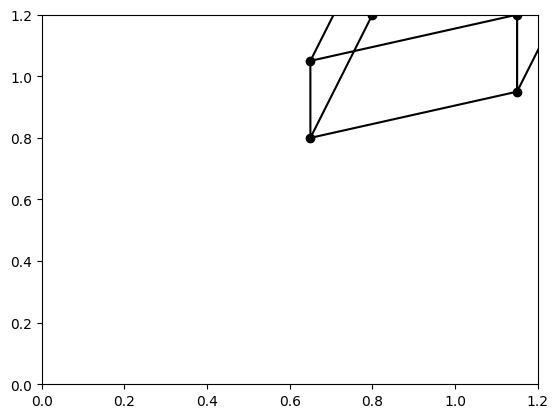

[[0.65, 0.8],
 [0.65, 1.05],
 [1.15, 0.95],
 [1.15, 1.2],
 [0.8, 1.2000000000000002],
 [0.8, 1.4500000000000002],
 [1.3, 1.35],
 [1.3, 1.6]]

In [6]:
y_cacl=calculadora_salidas(cubo,w)
dibuja(y_cacl )
y_cacl

In [7]:
def calcula_error(y_a, y_b):
    error = 0
    m = len(y_a)
    n = len(y_a[0])
    for j in range(m):
        yaj = y_a[j]
        ybj = y_b[j]
        for i in range(n):
            error = error + (yaj[i] - ybj[i])**2
    return error/(n*m)


error = calcula_error(sombra, y_cacl)
print('El error de la salida calculada es', error)

El error de la salida calculada es 0.18396797750000005


In [8]:
import copy


def backprop_lin(x, w_ant, y_esp, y_calc, va=0.1):

    w_sig = copy.deepcopy(w_ant)  # copia los pesos
    for i in range(len(w_sig)):  # para cada una de las salidas
        for j in range(len(w_sig[0])):  # para cada una de las entradas
            w_sig[i][j] = w_sig[i][j] + va * x[j] * (y_esp[i] - y_calc[i])
    return w_sig  # retorna los nuevos pesos


x = cubo[0]
ye = sombra[0]
yc = calcula_salida(x, w)
w_calc = backprop_lin(x, w, ye, yc, 1)
w_calc, calcula_error(calculadora_salidas(cubo, w_calc), sombra)

([[0.23814999999999997, 0.93815, -0.061850000000000016],
  [0.66315, 0.16314999999999996, 0.36315]],
 0.09655220625)

Epoca: 0 error: 0.18396797750000005


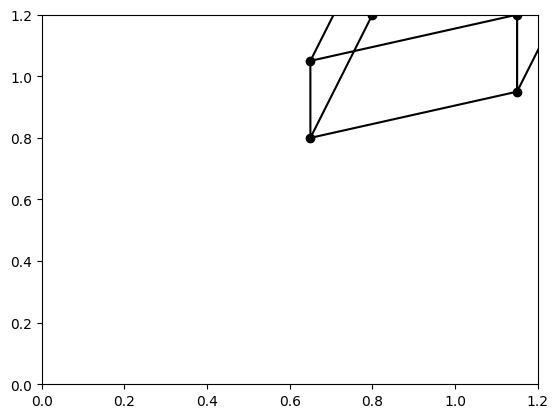

Epoca: 1 error: 0.05981447393357957


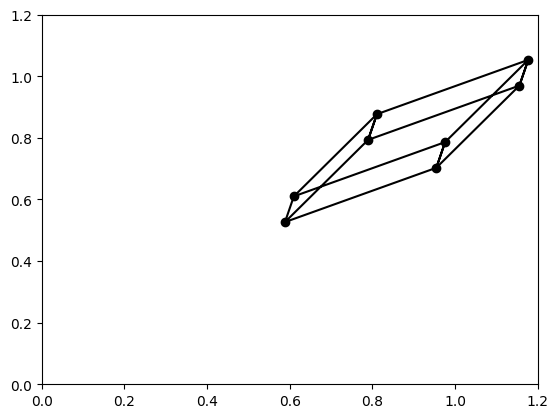

Epoca: 2 error: 0.036729941759601974


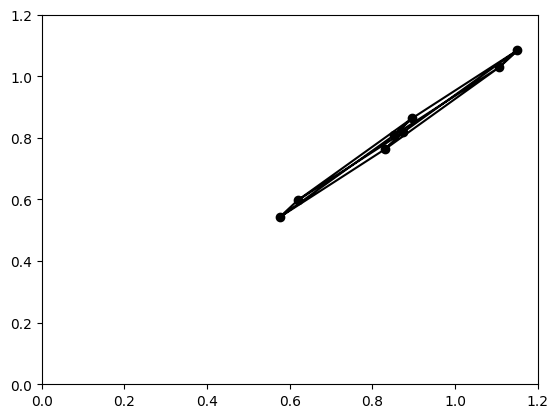

Epoca: 3 error: 0.023166040585458306


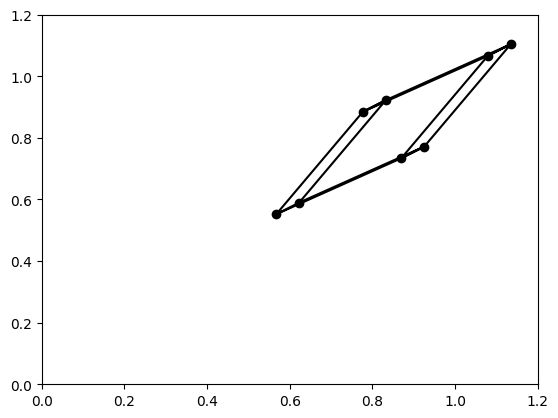

Epoca: 4 error: 0.01496580985480134


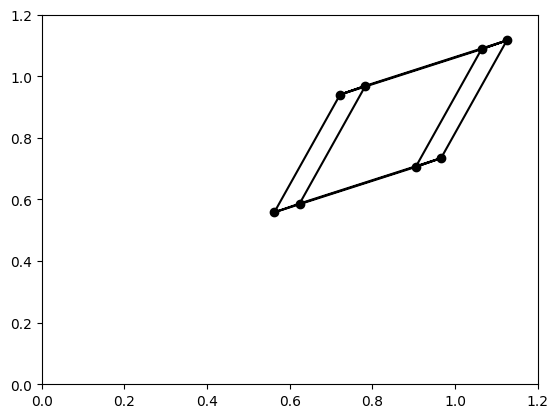

Epoca: 5 error: 0.009895374334138491


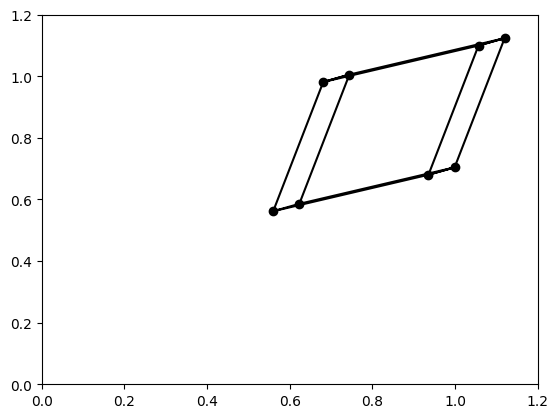

Epoca: 6 error: 0.006708407944255233


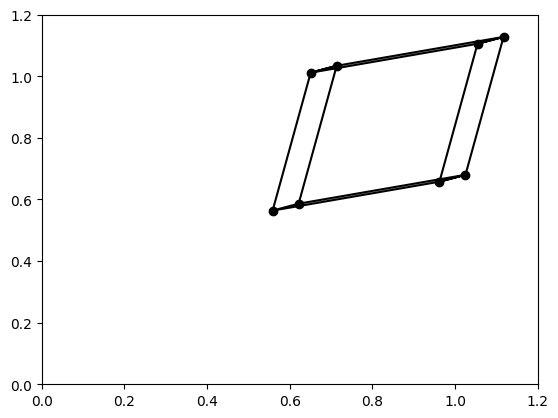

Epoca: 7 error: 0.004683530842301001


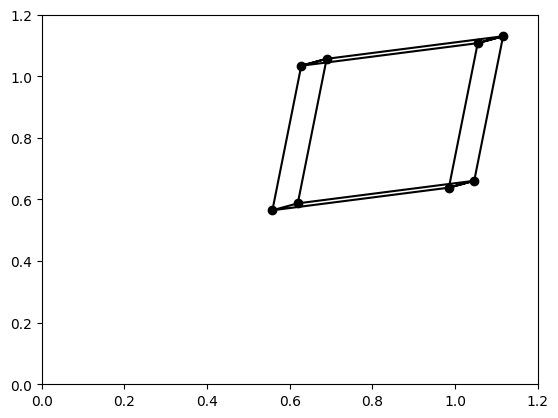

Epoca: 8 error: 0.003389193513614815


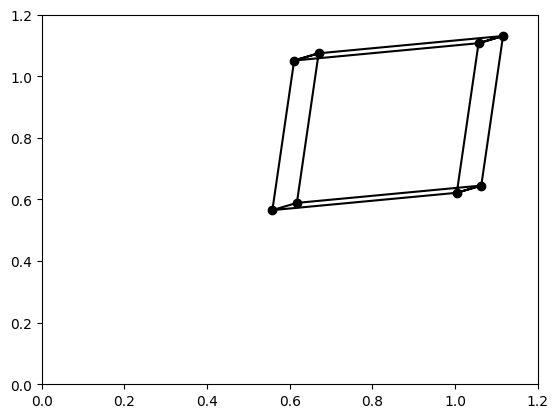

Epoca: 9 error: 0.002560081952221325


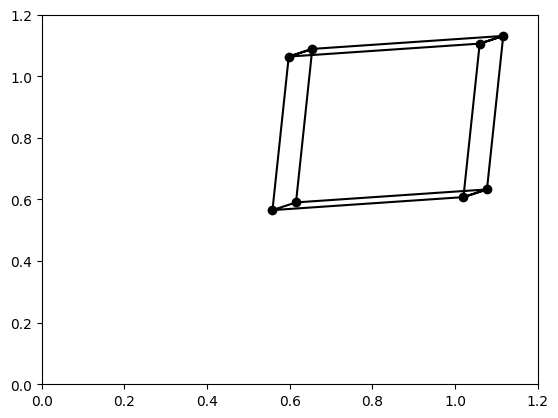

Epoca: 10 error: 0.002029630225071338


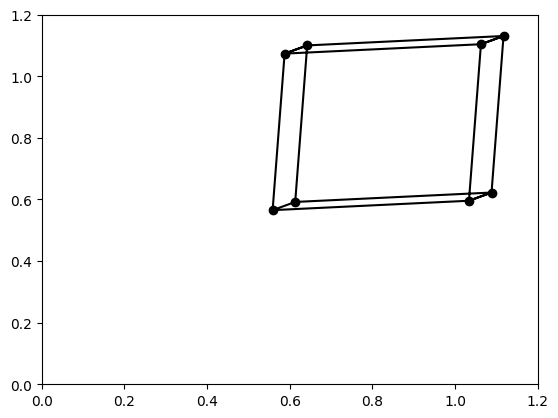

Epoca: 11 error: 0.0016916958196807799


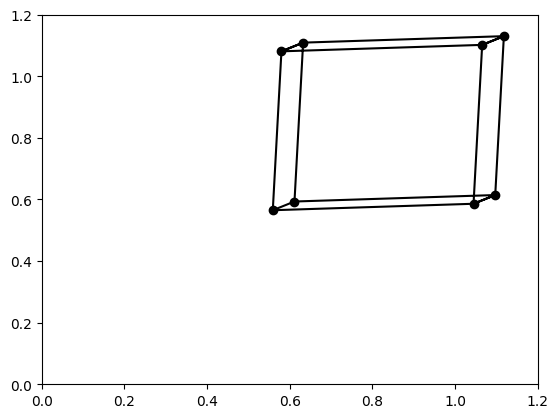

Epoca: 12 error: 0.0014779760721268594


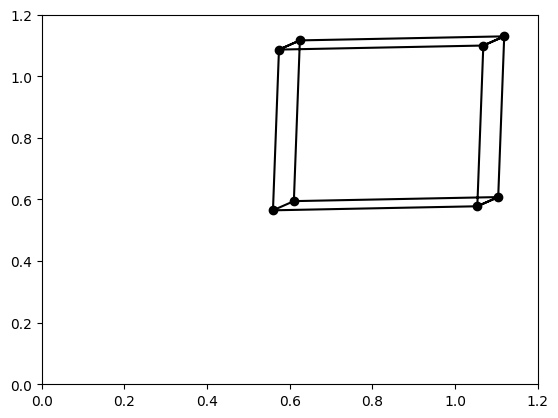

Epoca: 13 error: 0.0013442683470611028


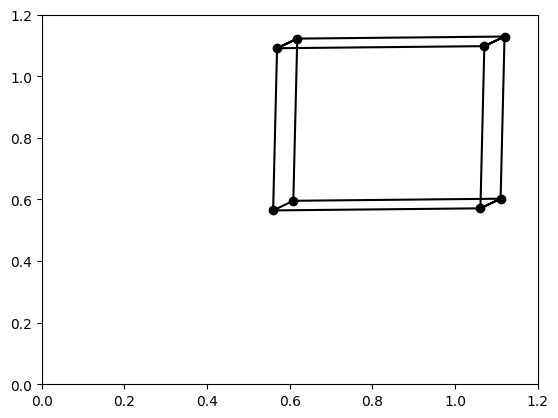

Epoca: 14 error: 0.0012618951908165595


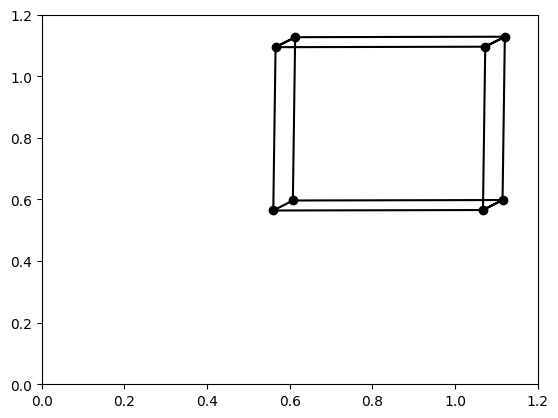

w_final= [[1.0240308782941685, 0.004725081211734872, 0.09231752435671037], [-0.005527336521729209, 1.066381828601984, 0.06708008122708253]]


In [9]:
def entrenamiento(xs, w, y_esp, va=0.1, epocas=1, dibujar=True):
    w1 = w  # copy.deepcopy(w)

    for k in range(epocas):
        y_calc = calculadora_salidas(cubo, w1)
        print('Epoca:', k, 'error:', calcula_error(y_calc, sombra))

        if dibujar == True:
            dibuja(y_calc)

        for i in range(len(xs)):
             x = xs[i]
             ye = y_esp[i]
             yc = calcula_salida(cubo[i], w1)
             w1 = backprop_lin(x, w1, ye, yc, va)
    return w1

# Ejemplo de uso:
w = [[w11, w12, w13], [w21, w22, w23]]  # Pesos iniciales (deben estar definidos previamente)

w_final = entrenamiento(cubo, w, sombra, 0.5, 15)
print('w_final=', w_final)

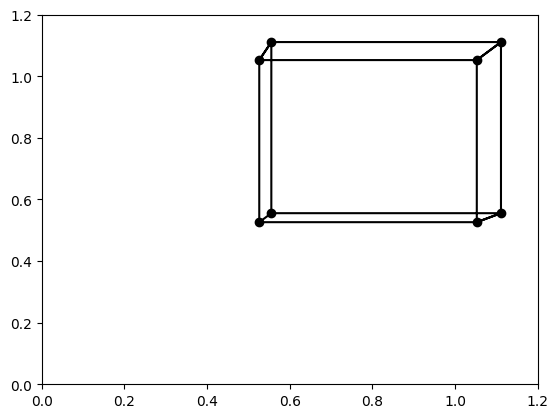

In [10]:
dibuja(sombra)


Mostrando sombra real:


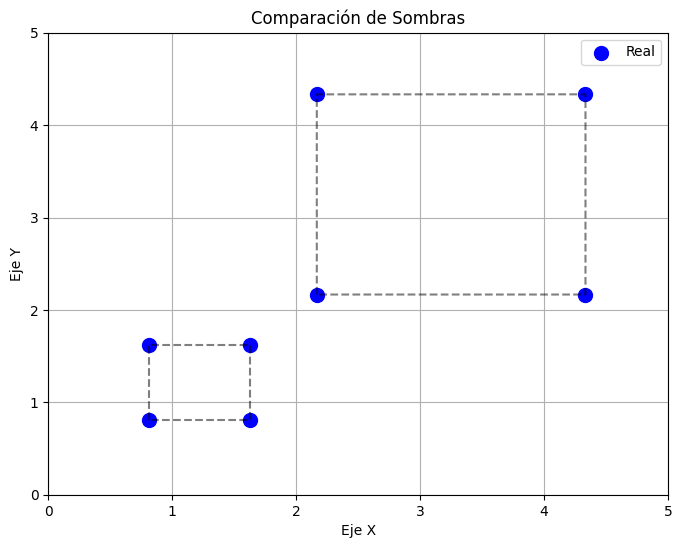


Iniciando entrenamiento...
Iteración 1/100 - Error: 2.854608
Iteración 2/100 - Error: 1.134588
Iteración 3/100 - Error: 1.067481
Iteración 4/100 - Error: 1.020639
Iteración 5/100 - Error: 0.968902
Iteración 6/100 - Error: 0.920022
Iteración 7/100 - Error: 0.875734
Iteración 8/100 - Error: 0.836008
Iteración 9/100 - Error: 0.800462
Iteración 10/100 - Error: 0.768680
Iteración 11/100 - Error: 0.740272
Iteración 12/100 - Error: 0.714886
Iteración 13/100 - Error: 0.692206
Iteración 14/100 - Error: 0.671949
Iteración 15/100 - Error: 0.653861
Iteración 16/100 - Error: 0.637713
Iteración 17/100 - Error: 0.623302
Iteración 18/100 - Error: 0.610445
Iteración 19/100 - Error: 0.598979
Iteración 20/100 - Error: 0.588756
Iteración 21/100 - Error: 0.579645
Iteración 22/100 - Error: 0.571529
Iteración 23/100 - Error: 0.564301
Iteración 24/100 - Error: 0.557869
Iteración 25/100 - Error: 0.552147
Iteración 26/100 - Error: 0.547059
Iteración 27/100 - Error: 0.542538
Iteración 28/100 - Error: 0.538524
I

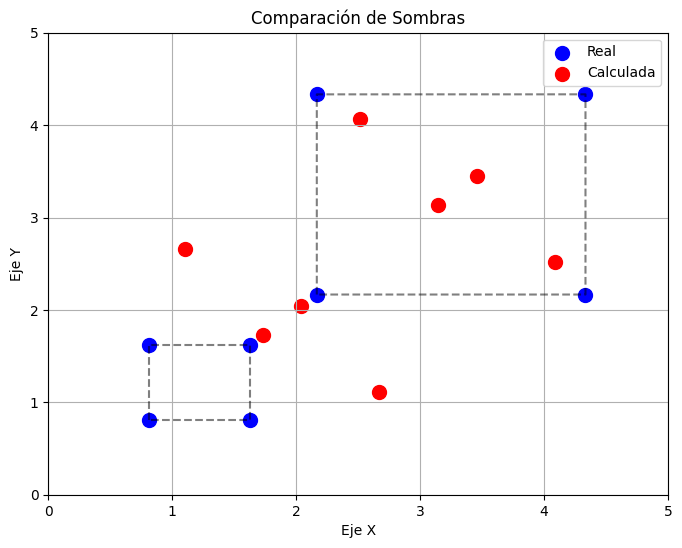


Error final tras entrenamiento: 0.510377


In [11]:
sombra2 = [[0.8125, 0.8125],
           [2.1666, 2.1666],
           [0.8125, 1.6250],
           [2.1666, 4.3330],
           [1.6250, 0.8125],
           [4.3333, 2.1666],
           [1.6250, 1.6250],
           [4.3333, 4.3333]]


import numpy as np
import matplotlib.pyplot as plt
import copy

# -----------------------
# MÉTRICA DE EVALUACIÓN
# -----------------------
def error_medio_cuadrado(salida_real, salida_predicha):
    total_error = 0
    n = len(salida_real)
    m = len(salida_real[0])
    for idx in range(n):
        for dim in range(m):
            total_error += (salida_real[idx][dim] - salida_predicha[idx][dim])**2
    return total_error / (n * m)

# -----------------------
# DATOS OBJETIVO
# -----------------------
sombra_objetivo = [
    [0.8125, 0.8125], [2.1666, 2.1666],
    [0.8125, 1.6250], [2.1666, 4.3330],
    [1.6250, 0.8125], [4.3333, 2.1666],
    [1.6250, 1.6250], [4.3333, 4.3333]
]

# -----------------------
# FUNCIONES DE DIBUJO
# -----------------------
def mostrar_sombras(sombra_real, sombra_estim=None):
    sombra_real = np.array(sombra_real)
    plt.figure(figsize=(8, 6))
    plt.scatter(sombra_real[:, 0], sombra_real[:, 1], color='blue', label='Real', s=100)

    if sombra_estim is not None:
        sombra_estim = np.array(sombra_estim)
        plt.scatter(sombra_estim[:, 0], sombra_estim[:, 1], color='red', label='Calculada', s=100)

    conexiones = [[0, 2, 6, 4, 0], [1, 3, 7, 5, 1]]
    for segmento in conexiones:
        plt.plot(sombra_real[segmento, 0], sombra_real[segmento, 1], 'k--', alpha=0.5)

    plt.title('Comparación de Sombras')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.axis([0, 5, 0, 5])
    plt.grid(True)
    plt.legend()
    plt.show()

# -----------------------
# MODELO LINEAL
# -----------------------
def salida_lineal(entrada, pesos):
    salida = []
    for neurona in pesos:
        activacion = sum(p * x for p, x in zip(neurona, entrada))
        salida.append(activacion)
    return salida

def salidas_batch(entradas, pesos):
    return [salida_lineal(ejemplo, pesos) for ejemplo in entradas]

# -----------------------
# ACTUALIZACIÓN DE PESOS
# -----------------------
def ajustar_pesos(entrada, pesos_actuales, salida_deseada, salida_obtenida, lr=0.1):
    nuevos_pesos = copy.deepcopy(pesos_actuales)
    for i in range(len(nuevos_pesos)):
        for j in range(len(nuevos_pesos[i])):
            nuevos_pesos[i][j] += lr * entrada[j] * (salida_deseada[i] - salida_obtenida[i])
    return nuevos_pesos

# -----------------------
# ENTRENAMIENTO
# -----------------------
def entrenar_modelo(entradas, pesos_iniciales, salidas_objetivo, lr=0.1, iteraciones=10):
    pesos = copy.deepcopy(pesos_iniciales)

    for ep in range(iteraciones):
        salidas = salidas_batch(entradas, pesos)
        err = error_medio_cuadrado(salidas_objetivo, salidas)
        print(f"Iteración {ep+1}/{iteraciones} - Error: {err:.6f}")

        for idx, entrada in enumerate(entradas):
            salida_esp = salidas_objetivo[idx]
            salida_calc = salida_lineal(entrada, pesos)
            pesos = ajustar_pesos(entrada, pesos, salida_esp, salida_calc, lr)

    return pesos

# -----------------------
# DATOS DE ENTRADA (3D)
# -----------------------
coordenadas_3D = [
    [0.5, 0.5, 0.5], [0.5, 0.5, 1.0],
    [0.5, 1.0, 0.5], [0.5, 1.0, 1.0],
    [1.0, 0.5, 0.5], [1.0, 0.5, 1.0],
    [1.0, 1.0, 0.5], [1.0, 1.0, 1.0]
]

pesos_iniciales = [
    [0.3, 1.0, 0.0],
    [0.8, 0.3, 0.5]
]

# -----------------------
# EJECUCIÓN
# -----------------------
print("\nMostrando sombra real:")
mostrar_sombras(sombra_objetivo)

print("\nIniciando entrenamiento...")
pesos_entrenados = entrenar_modelo(coordenadas_3D, pesos_iniciales, sombra_objetivo, lr=0.1, iteraciones=100)

print("\nPesos obtenidos:")
print(pesos_entrenados)

sombra_generada = salidas_batch(coordenadas_3D, pesos_entrenados)

print("\nMostrando sombra calculada:")
mostrar_sombras(sombra_objetivo, sombra_generada)

error_final = error_medio_cuadrado(sombra_generada, sombra_objetivo)
print(f"\nError final tras entrenamiento: {error_final:.6f}")
